In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
import numpy as np
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA

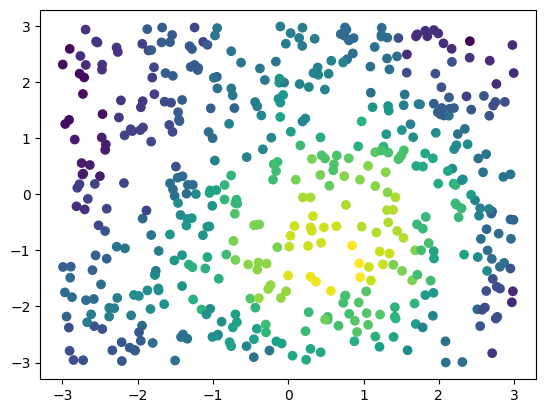

In [12]:
# Ex 1.
n_samples = 500
n_features = 2
dataset = make_blobs(n_samples=500, centers=[[0, 0]], n_features=n_features)

class SimpleLODA:
    def __init__(self, nProj, nBins):
        self.nProj = nProj
        self.nBins = nBins

    def train(self, X):
        self.projectionVecs = np.array([self.get_projection_vector() for _ in range(self.nProj)])
        datapointProjections = np.dot(X, self.projectionVecs.T)

        bins = []
        binProbs = []
        for proj in range(len(self.projectionVecs)):
            eps = 1
            projections = datapointProjections[:,proj]
            histogramRange = (np.min(projections)-eps, np.max(projections)+eps)
            histogram, histBin = np.histogram(projections, bins=self.nBins, range=histogramRange)
            binProb = histogram / histogram.sum()
            binProbs.append(binProb)
            bins.append(histBin)

        self.bins = np.array(bins)
        self.binProbs = np.array(binProbs)

    def get_projection_vector(self):
        projectionVec = np.random.multivariate_normal(np.zeros(2), np.eye(2))
        return projectionVec / np.linalg.norm(projectionVec)

    def getScores(self, X):
        projections = np.dot(X, self.projectionVecs.T)
        projBinProbs = []
        for projIdx in range(self.nProj):
            proj = projections[:, projIdx]
            projBin = np.digitize(proj, self.bins[projIdx])
            projBin = np.clip(projBin, 0, self.nBins-1)
            projBinProbs.append(self.binProbs[projIdx, projBin])

        projBinProbs = np.array(projBinProbs).T
        return np.apply_along_axis(lambda x : x.mean(), 1, projBinProbs)
        

model = SimpleLODA(5, 10)
model.train(dataset[0])
testdata = np.random.uniform(-3, 3, size=(500,2))
plt.scatter(testdata[:,0], testdata[:,1], c=model.getScores(testdata))
plt.show()

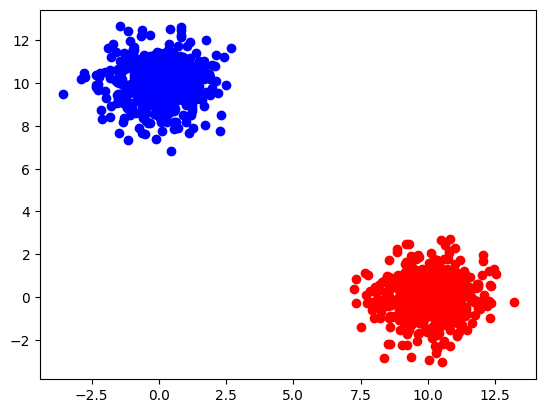

In [23]:
# Ex 2.
def scatter_blobs(num_centers, dataset):
    colors = ['red', 'blue', 'green', 'yellow']
    blob_indices = [dataset[1] == i for i in range(num_centers)]
    for i in range(num_centers):
        plt.scatter(dataset[0][blob_indices[i], 0], dataset[0][blob_indices[i], 1], c=colors[i])
    plt.show()

n_blobs = 2
n_samples_per_blob = 500
n_samples = np.ones(shape=n_blobs).astype(np.int32) * n_samples_per_blob
centers = np.array([
    [10., 0.],
    [0., 10.],
])
cluster_std = np.array([1, 1])
dataset = make_blobs(n_samples=n_samples, n_features=2, centers=centers, cluster_std=cluster_std)
scatter_blobs(n_blobs, dataset)

testdata = np.random.uniform(-10, 20, size=(1000, 2))

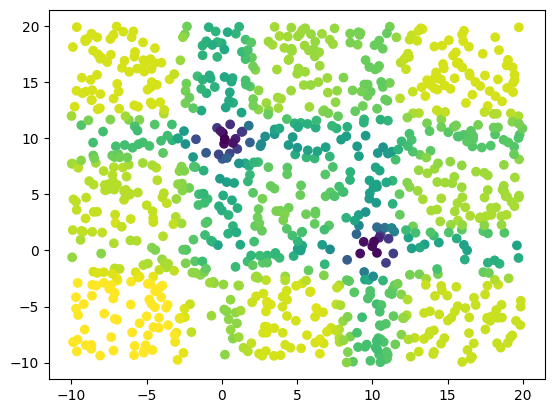

In [24]:
model = IForest(contamination=0.2)
model.fit(dataset[0])
plt.scatter(testdata[:,0], testdata[:,1], c=model.decision_function(testdata))

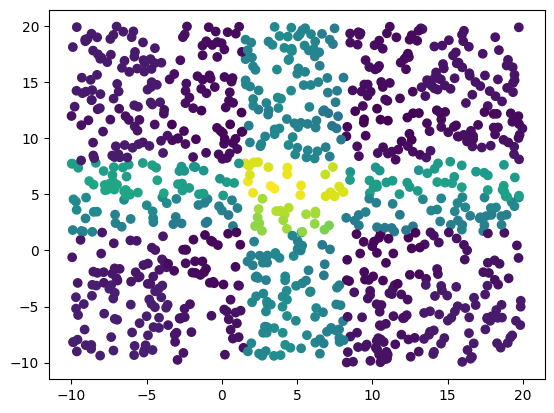

In [42]:
model = LODA(contamination=0.2)
model.fit(dataset[0])
plt.scatter(testdata[:,0], testdata[:,1], c=model.decision_function(testdata))

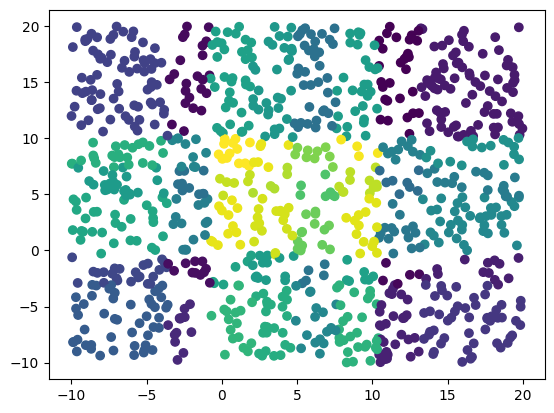

In [49]:
model = LODA(contamination=0.2, n_bins=6)
model.fit(dataset[0])
plt.scatter(testdata[:,0], testdata[:,1], c=model.decision_function(testdata))

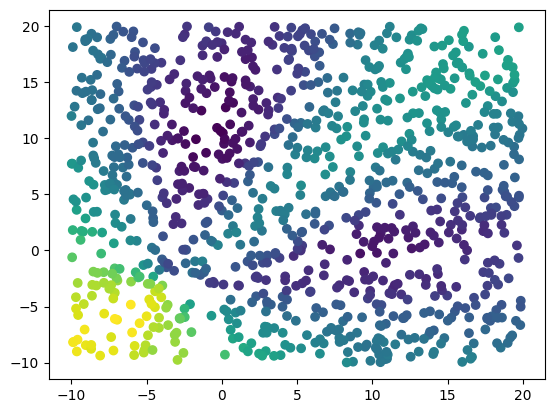

In [35]:
model = DIF(contamination=0.2)
model.fit(dataset[0])
plt.scatter(testdata[:,0], testdata[:,1], c=model.decision_function(testdata))

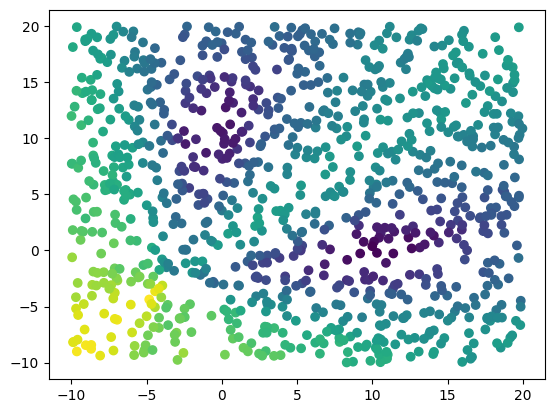

In [36]:
model = DIF(contamination=0.2, hidden_neurons=[256, 128, 64])
model.fit(dataset[0])
plt.scatter(testdata[:,0], testdata[:,1], c=model.decision_function(testdata))